In [218]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [220]:
ratings = pd.read_csv('reviews.csv')
ratings
#reviews
#

,User ID,Product ID,Rating,Product Name
0,196,242,3,Wayona Usb Type C To Usb Nylon Braided Quick C...
1,186,302,3,TIZUM High Speed HDMI Cable Aura -Gold Plated-...
2,22,377,1,Noise ColorFit Pro 4 Advanced Bluetooth Callin...
3,244,51,2,TP-Link AC600 600 Mbps WiFi Wireless Network U...
4,166,346,1,"Nokia 105 Single SIM, Keypad Mobile Phone with..."
...,...,...,...,...
35626,113,975,5,KINGONE Wireless Charging Pencil (2nd Generati...
35627,279,64,1,AmazonBasics USB Type-C to USB Type-C 2.0 Cabl...
35628,13,225,2,TATA SKY HD Connection with 1 month basic pack...
35629,12,203,3,Universal Remote Control for All Sony TV for A...


In [242]:
# Step 1: Group by Product ID and aggregate average rating, count, and take one product name
popular = ratings.groupby('Product ID').agg({
    'Rating': ['mean', 'count'],
    'Product Name': 'first'  # assumes each product ID has a single consistent name
})

# Step 2: Flatten the column names
popular.columns = ['average_rating', 'rating_counts', 'Product Name']

# Step 3: Sort by average rating and select top 10
popular = popular.sort_values('average_rating', ascending=False)

# Step 4: Reset index so Product ID becomes a column
popular = popular.reset_index()

# Step 5: Reorder columns
popular = popular[['Product ID', 'Product Name', 'rating_counts', 'average_rating']]





In [244]:
popular

,Product ID,Product Name,rating_counts,average_rating
0,909,HP 330 Wireless Black Keyboard and Mouse Set w...,2,5.000000
1,814,Samsung Original Type C to C Cable - 3.28 Feet...,1,5.000000
2,958,Inventis 5V 1.2W Portable Flexible USB LED Lig...,4,4.750000
3,793,Crucial BX500 240GB 3D NAND SATA 6.35 cm (2.5-...,3,4.666667
4,113,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,3,4.666667
...,...,...,...,...
974,852,Wacom One by CTL-472/K0-CX Digital Drawing Gra...,1,1.000000
975,858,"Infinity (JBL Glide 510, 72 Hrs Playtime with ...",2,1.000000
976,913,Wayona Type C To Type C 65W/3.25A Nylon Braide...,1,1.000000
977,907,Lapster 1.5 mtr USB 2.0 Type A Male to USB A M...,1,1.000000


In [270]:
ratings_mean_count = popular[(popular['average_rating'] > 3) & (popular['rating_counts'] > 100)]
ratings_mean_count = ratings_mean_count.sort_values(by=['rating_counts'], ascending=[ False]).head(15)
ratings_mean_count

,Product ID,Product Name,rating_counts,average_rating
25,50,Amazonbasics Micro Usb Fast Charging Cable For...,213,4.380282
57,100,Wayona Type C to Lightning MFI Certified 20W F...,197,4.274112
306,258,Wayona USB Type C Fast Charging Cable Charger ...,194,3.757732
652,294,"Tuarso 8K HDMI 2.1 Cable 48Gbps , 1.5 Meter Hi...",184,3.081522
162,181,Sony TV - Remote Compatible for Sony LED Remot...,183,4.005464
344,286,pTron Solero T241 2.4A Type-C Data & Charging ...,179,3.703911
451,288,Storite Super Speed USB 3.0 Male to Male Cable...,174,3.522989
217,1,Wayona Nylon Braided USB to Lightning Fast Cha...,171,3.912281
535,121,Belkin Apple Certified Lightning To Type C Cab...,169,3.349112
33,98,"Gilary Multi Charging Cable, 3 in 1 Nylon Brai...",160,4.362500


In [286]:
def popular_products():
    # Create a list of recommended product info
    top_products = ratings_mean_count.sort_values('average_rating', ascending=False).head(15)
    recommended_products = []

    for product_id, row in top_products.iterrows():
        recommended_products.append({
            "id": product_id,
            "name": row['Product Name'],
        })

    return recommended_products,top_products


NameError: name 'top_products' is not defined

In [288]:
popular_products()

([{'id': 25,
   'name': 'Amazonbasics Micro Usb Fast Charging Cable For Android Smartphone,Personal Computer,Printer With Gold Plated Connectors (6 Feet, Black)'},
  {'id': 33,
   'name': 'Gilary Multi Charging Cable, 3 in 1 Nylon Braided Fast Charging Cable for iPhone Micro USB Type C Mobile Phone | Colour May Vary |'},
  {'id': 54,
   'name': 'Wayona USB Type C 65W Fast Charging 2M/6Ft Long Flash Charge Cable 3A QC 3.0 Data Cable Compatible with Samsung Galaxy S21 S10 S9 S8, iQOO Z3, Vivo, Note 10 9 8, A20e A40 A50 A70, Moto G7 G8 (2M, Grey)'},
  {'id': 57,
   'name': 'Wayona Type C to Lightning MFI Certified 20W Fast charging Nylon Braided USB C Cable for iPhone 14, 14 Pro, 14 Pro Max, 14 Plus, 13, 13 Pro, 13 Pro Max, 13 Mini, 12, 12 Pro, 11, 11 Pro Max iPhone 12 Mini, X, 8 (2M, Grey)'},
  {'id': 91, 'name': 'Tata Sky Universal Remote'},
  {'id': 162,
   'name': 'Sony TV - Remote Compatible for Sony LED Remote Control Works with Sony LED TV by Trend Trail Speed tech & Remote hi Remo

In [232]:

popular.describe()

count    10.000000
mean      4.694043
std       0.174333
min       4.526786
25%       4.585648
50%       4.643860
75%       4.729167
max       5.000000
Name: Rating, dtype: float64

In [216]:
popular

,average_rating,rating_counts
Product ID,,
909,5.000000,2
814,5.000000,1
958,4.750000,4
793,4.666667,3
113,4.666667,3
...,...,...
852,1.000000,1
858,1.000000,2
913,1.000000,1


In [ ]:
ratings_per_user0.describe()

In [99]:
ratings_per_user0 = ratings.groupby('User ID')['Product ID'].nunique().reset_index()

# Rename columns for clarity
ratings_per_user0.columns = ['User ID', 'products_rated']

# Display result
ratings_per_user0.describe()

,User ID,products_rated
count,350.000000,350.000000
mean,175.500000,101.802857
std,101.180532,94.260983
min,1.000000,15.000000
25%,88.250000,30.000000
50%,175.500000,62.000000
75%,262.750000,146.750000
max,350.000000,636.000000


In [9]:
# Step 1: Filter products rated more than 5 times
product_counts = ratings['Product ID'].value_counts()
popular_products = product_counts[product_counts > 5].index
filtered_ratings = ratings[ratings['Product ID'].isin(popular_products)]

# Step 2: Filter users who rated more than 10 products
user_counts = filtered_ratings['User ID'].value_counts()
active_users = user_counts[user_counts > 10].index
filtered_ratings = filtered_ratings[filtered_ratings['User ID'].isin(active_users)]

# Result: `filtered_ratings` is your cleaned dataset
print(filtered_ratings.shape)
print(filtered_ratings.head())


(35251, 3)
   User ID  Product ID  Rating
0      196         242       3
1      186         302       3
3      244          51       2
4      166         346       1
5      298         474       4


In [87]:
ratings_per_user = filtered_ratings.groupby('User ID')['Product ID'].nunique().reset_index()

# Rename columns for clarity
ratings_per_user.columns = ['User ID', 'products_rated']

# Display result
ratings_per_user.describe()

,User ID,products_rated
count,350.000000,350.000000
mean,175.500000,100.717143
std,101.180532,92.042425
min,1.000000,14.000000
25%,88.250000,29.250000
50%,175.500000,61.500000
75%,262.750000,144.250000
max,350.000000,565.000000


In [89]:
filtered_ratings.describe()

,User ID,Product ID,Rating
count,35251.000000,35251.000000,35251.000000
mean,185.798757,354.897166,3.617202
std,107.180250,250.515722,1.115570
min,1.000000,1.000000,1.000000
25%,90.000000,159.000000,3.000000
50%,197.000000,289.000000,4.000000
75%,286.000000,521.000000,4.000000
max,350.000000,979.000000,5.000000


In [129]:
df_colab_pivot = filtered_ratings.pivot_table(columns="Product ID", index="User ID", values="Rating").fillna(0)
df_colab_pivot

Product ID,1,2,3,4,5,6,7,8,9,10,...,968,969,971,972,974,975,976,977,978,979
User ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.0,5.0,3.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
347,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
348,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

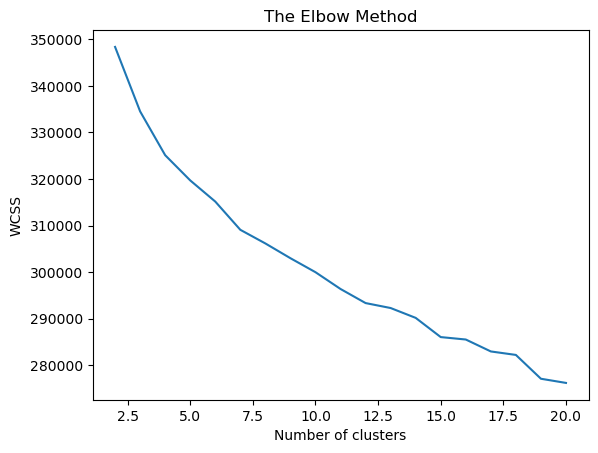

In [168]:
wcss = []
for i in range(2,21):
    kmeans = KMeans(n_clusters = i ,n_init = 10, init='k-means++' , random_state=1)
    kmeans.fit(df_colab_pivot)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [170]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Step 1: Calculate SSE for a range of k values
sse = []
K_range = range(1, 21)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=5, init='k-means++', random_state=0)
    kmeans.fit(df_colab_pivot)
    sse.append(kmeans.inertia_)

# Step 2: Find elbow point
knee = KneeLocator(K_range, sse, curve="convex", direction="decreasing")
elbow_k = knee.elbow

# Step 3: Set a minimum k
best_k = max(elbow_k if elbow_k else 6, 5)

print(f"Optimal k (with min constraint): {best_k}")

# Step 4: Cluster with the optimal k
kmeans = KMeans(n_clusters=best_k, n_init=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(df_colab_pivot)
df_colab_pivot['cluster'] = y_kmeans


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Optimal k (with min constraint): 5


In [192]:
kmeans = KMeans(n_clusters =  5,n_init = 5, init='k-means++' , random_state = 42)
y_kmeans = kmeans.fit_predict(df_colab_pivot)
df_colab_pivot['cluster'] = y_kmeans
cluster_counts = df_colab_pivot['cluster'].value_counts().sort_index()
print(cluster_counts)

cluster
0     71
1     53
2     44
3     31
4    151
Name: count, dtype: int64


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [194]:
df_colab_pivot = df_colab_pivot.drop(columns="cluster")

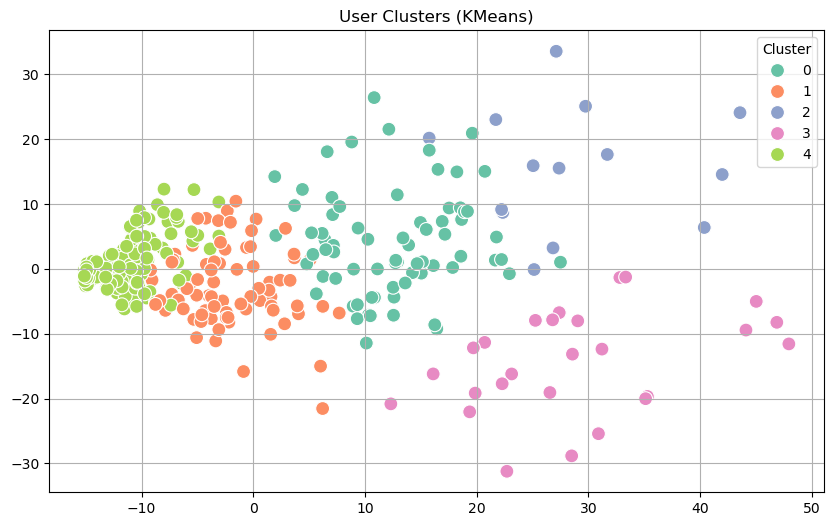

In [172]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Use the values (NumPy array) to avoid column name type issues
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_colab_pivot.values)  # <--- fix here

# Create plot dataframe
plot_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
plot_df['cluster'] = y_kmeans

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=100)
plt.title('User Clusters (KMeans)')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [121]:
def recommend_movies(user_id):
    if user_id not in df_colab_pivot.index:
        return f"User {user_id} not found."

    # Get the cluster of the given user
    cluster_n = df_colab_pivot.loc[user_id, 'cluster']

    # Get all users in the same cluster
    cluster_users = df_colab_pivot[df_colab_pivot['cluster'] == cluster_n]

    # Remove the cluster column
    cluster_users = cluster_users.drop(columns='cluster')

    # Get movies the user has already rated
    rated_by_user = cluster_users.loc[user_id]
    already_rated = rated_by_user[rated_by_user > 0].index

    # Calculate average ratings per movie in the cluster
    movie_means = cluster_users.mean().sort_values(ascending=False)

    # Remove already rated movies
    recommendations = movie_means.drop(already_rated).head(5)

    return recommendations


In [123]:
recommend_movies(1)

Product ID
288    3.428571
410    3.142857
566    3.142857
385    3.071429
455    3.071429
dtype: float64

In [125]:
from itertools import combinations

def average_similarity_in_cluster(cluster_label, pivot_df):
    # Extract only the users in this cluster
    users_in_cluster = pivot_df[pivot_df['cluster'] == cluster_label].index.tolist()
    
    # Prepare to accumulate similarity scores
    similarity_scores = []
    
    # Pre-drop the cluster column once
    ratings_df = pivot_df.drop(columns='cluster')
    
    # Loop over all unique user-user pairs
    for user1, user2 in combinations(users_in_cluster, 2):
        # Get their ratings
        user1_ratings = ratings_df.loc[user1]
        user2_ratings = ratings_df.loc[user2]
        
        # Find common rated movies
        common_movies = (user1_ratings > 0) & (user2_ratings > 0)
        if not common_movies.any():
            # No common ratings, skip
            continue
        
        # Compare ratings for common movies
        comparison_df = pd.DataFrame({
            'Movie': user1_ratings[common_movies].index,
            f'User {user1} Rating': user1_ratings[common_movies].values,
            f'User {user2} Rating': user2_ratings[common_movies].values
        })
        comparison_df['Abs Difference'] = abs(comparison_df[f'User {user1} Rating'] - comparison_df[f'User {user2} Rating'])
        
        # Compute similarity score
        max_diff = 4  # assuming ratings are from 1 to 5
        avg_abs_diff = comparison_df['Abs Difference'].mean()
        similarity_score = 1 - (avg_abs_diff / max_diff)
        
        # Add the score to the list
        similarity_scores.append(similarity_score)
    
    # If there are no valid pairs (all pairs had no common movies), return 0
    if not similarity_scores:
        return 0
    
    # Calculate the average similarity score
    avg_similarity = round(sum(similarity_scores) / len(similarity_scores), 3)
    return avg_similarity



In [150]:
cluster_labels = df_colab_pivot['cluster'].unique()

for label in cluster_labels:
    avg_sim = average_similarity_in_cluster(label, df_colab_pivot)
    print(f"Average Similarity for Cluster {label}: {avg_sim}")



Average Similarity for Cluster 0: 0.753
Average Similarity for Cluster 1: 0.722
Average Similarity for Cluster 2: 0.768
